In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Specify an input domain for the functions
ts = np.arange(-4., 4., 0.025)

# Create two lambdas that define the two channels of the signal
f1 = lambda t: (np.sin(t) - np.sin(np.exp(-0.7 * t))).reshape(-1, 1)
f2 = lambda t: (np.exp(np.cos(2*t)) * np.cos(t - 5)).reshape(-1, 1)

# Compute function values evaluated on the provided time domain
F1, F2 = f1(ts), f2(ts)
# Combine F1 and F2 to form the channels for the signal F
F = np.hstack((F1, F2))

In [3]:
import sigment as sig

# Create a complex augmentation pipeline 
transform = sig.Pipeline([
    sig.Sometimes([
        sig.OneOf([
            sig.UniformWhiteNoise(upper=(0.1, 0.4)),
            sig.GaussianWhiteNoise(scale=(0.01, 0.075)),
            sig.LaplacianWhiteNoise(scale=(0.01, 0.075))
        ])
    ], p=0.65),
    sig.SomeOf([
        sig.EdgeCrop('start', crop_size=(0.05, 0.15)),
        sig.EdgeCrop('end', crop_size=(0.05, 0.15))
    ], n=(1, 2)),
    sig.Sometimes([
        sig.SomeOf([
            sig.Fade('in', fade_size=(0.1, 0.2)),
            sig.Fade('out', fade_size=(0.1, 0.2))
        ], n=(1, 2))
    ], p=0.5),
    sig.TimeStretch(rate=(0.7, 1.3)),
    sig.PitchShift(n_steps=(-0.25, 0.25)),
])

# Generate 25 augmentations of the signal F
Fs = transform.generate(F, n=25, sr=50)

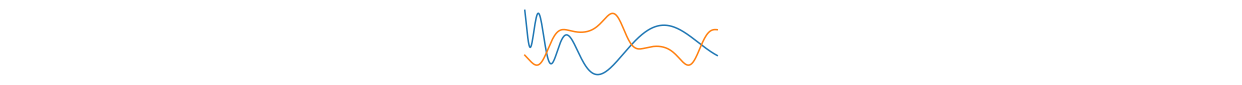

In [4]:
n = 5 # Must be odd!

fig, axs = plt.subplots(1, n, figsize=(22, 1.3), sharey=True)

for i in range(n):
    ax = axs[i]
    ax.plot(F if i == n // 2 else [])
    ax.axis('off')
    
plt.savefig('original', transparent=True)
plt.show()

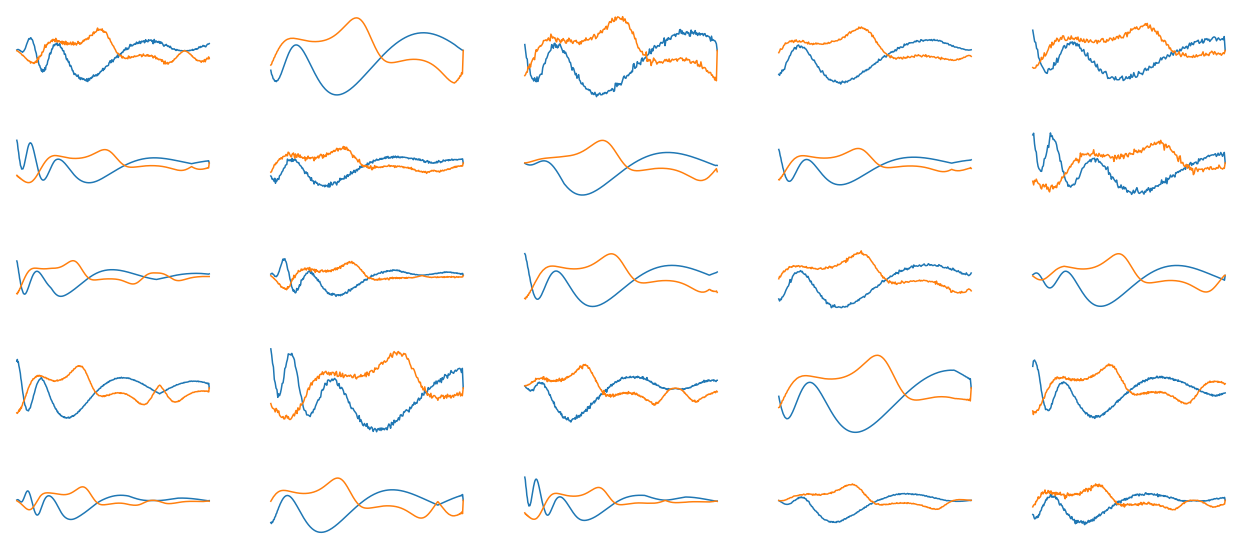

In [5]:
fig, axs = plt.subplots(n, n, figsize=(22, 10), sharey=True)
axs = axs.flat
    
for i, aug in enumerate(Fs):
    ax = axs[i]
    ax.plot(aug)
    ax.axis('off')
    
plt.savefig('augmented', transparent=True)
plt.show()